In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [231]:
df = pd.read_csv('lsu.csv')

In [232]:
df.head()


,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,9/4/22,lsu,N,Florida State,L (23-24),20,33,60.6,260,2,...,5.4,14,8,3,25,4,45,2,0,2
1,9/10/22,lsu,NaN,Southern,W (65-17),9,17,52.9,61,0,...,7.9,13,10,0,23,6,40,0,2,2
2,9/17/22,lsu,NaN,Mississippi State,W (31-16),24,42,57.1,214,1,...,5.6,11,8,1,20,7,39,1,0,1
3,9/24/22,lsu,NaN,New Mexico,W (38-0),4,6,66.7,51,0,...,7.9,16,11,1,28,5,60,1,0,1
4,10/1/22,lsu,@,Auburn,W (21-17),19,39,48.7,337,2,...,3.6,2,14,3,19,10,94,1,0,1


In [233]:
df["team_code"] = df["team"].astype("category").cat.codes

In [234]:
df["opponent_code"] = df["Opponent"].astype("category").cat.codes

In [235]:
dates = df["Date"]

In [236]:
months = []

for i in dates: 
    if(i[1] == '/'):
        months.append(f'0{i[0]}')
    if(i[2] == '/'):
        months.append(i[0:2])
        
#         print(f'Hello {name}! This is {program}')

In [237]:
days = []

for i in dates: 
    if(i[1] == '/'):
        if (i[3] == '/'):
            days.append(f'0{i[2]}')
        if (i[4] == '/'):
            days.append(i[2:4])
    if(i[2] == "/"):
        if (i[4] =="/"):
            days.append(f'0{i[3:4]}')
        if (i[5] == '/'):
            days.append(i[3:5])
#     else:
#         months.append(i[0:2])
        


In [238]:
years = []

for i in dates: 
    years.append('2022')
        
#         print(f'Hello {name}! This is {program}')

In [239]:
len(months)

97

In [240]:
df.shape

(97, 49)

In [241]:
df['months']= months
df['years'] = years
df['days'] = days

In [242]:
# y-m-d

df["dates"] = df['years'].astype(str) +"-"+ df['months'].astype(str) + "-" + df['days'].astype(str)

In [243]:
df = df.drop(columns=['months', 'years', 'days'])

In [244]:
df["dates"].value_counts()

2022-09-10    12
2022-09-17    12
2022-09-24    12
2022-10-08    12
2022-10-01     9
2022-10-15     9
2022-10-29     9
2022-09-03     9
2022-10-22     8
2022-09-01     2
2022-09-04     1
2022-10-02     1
2022-09-29     1
Name: dates, dtype: int64

In [245]:
df['dates'] = pd.to_datetime(df['dates'])

In [246]:
df["day_code"] = df["dates"].dt.dayofweek

In [247]:
df['dates'].value_counts()

2022-09-10    12
2022-09-17    12
2022-09-24    12
2022-10-08    12
2022-10-01     9
2022-10-15     9
2022-10-29     9
2022-09-03     9
2022-10-22     8
2022-09-01     2
2022-09-04     1
2022-10-02     1
2022-09-29     1
Name: dates, dtype: int64

In [248]:
df['day_code'].value_counts()

5    92
3     3
6     2
Name: day_code, dtype: int64

In [249]:
# df['Opponent'].value_counts()

In [250]:
df['team'].value_counts()

ole miss          9
lsu               8
tennessee         8
alabama           8
florida           8
aubrun            8
miss_state        8
kentucky          8
Arkansas          8
texas_am          8
south_carolina    8
missouri          8
Name: team, dtype: int64

In [251]:
df['Opponent'].value_counts()

Texas A&M               5
Mississippi State       5
Arkansas                5
Louisiana State         5
Kentucky                5
Georgia                 4
Auburn                  4
Tennessee               4
Florida                 4
Mississippi             4
Alabama                 4
South Carolina          4
Vanderbilt              3
Missouri                3
Cincinnati              1
Florida State           1
Missouri State          1
Youngstown State        1
Miami (OH)              1
Bowling Green State     1
Northern Illinois       1
Appalachian State       1
Brigham Young           1
Sam Houston State       1
Memphis                 1
Miami (FL)              1
Georgia State           1
Charlotte               1
South Carolina State    1
Louisiana Tech          1
Kansas State            1
Arizona                 1
Troy                    1
Penn State              1
Louisiana-Monroe        1
New Mexico              1
Ball State              1
Pittsburgh              1
Akron       

In [252]:
res = df['results']

In [253]:
lsu_w = []

for i in res:
    if (i[0] == 'L'):
        lsu_w.append(0)
    else: 
        lsu_w.append(1)

In [254]:
df1 = df.copy()

In [255]:
df1['results'] = lsu_w

In [256]:
df1.head()

,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot,team_code,opponent_code,dates,day_code
0,9/4/22,lsu,N,Florida State,0,20,33,60.6,260,2,...,25,4,45,2,0,2,5,15,2022-09-04,6
1,9/10/22,lsu,NaN,Southern,1,9,17,52.9,61,0,...,23,6,40,0,2,2,5,41,2022-09-10,5
2,9/17/22,lsu,NaN,Mississippi State,1,24,42,57.1,214,1,...,20,7,39,1,0,1,5,29,2022-09-17,5
3,9/24/22,lsu,NaN,New Mexico,1,4,6,66.7,51,0,...,28,5,60,1,0,1,5,32,2022-09-24,5
4,10/1/22,lsu,@,Auburn,1,19,39,48.7,337,2,...,19,10,94,1,0,1,5,6,2022-10-01,5


In [257]:
# home away or neutral site
# home 0
# away 1
# neutral 2
locations = []

for index, row in df.iterrows():
    if(row['location'] == '@'):
        locations.append(1)
    elif(row['location'] == 'N'):
        locations.append(2)
    else:
        locations.append(0)

In [258]:
df1['location'] = locations

In [259]:
df1

,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot,team_code,opponent_code,dates,day_code
0,9/4/22,lsu,2,Florida State,0,20,33,60.6,260,2,...,25,4,45,2,0,2,5,15,2022-09-04,6
1,9/10/22,lsu,0,Southern,1,9,17,52.9,61,0,...,23,6,40,0,2,2,5,41,2022-09-10,5
2,9/17/22,lsu,0,Mississippi State,1,24,42,57.1,214,1,...,20,7,39,1,0,1,5,29,2022-09-17,5
3,9/24/22,lsu,0,New Mexico,1,4,6,66.7,51,0,...,28,5,60,1,0,1,5,32,2022-09-24,5
4,10/1/22,lsu,1,Auburn,1,19,39,48.7,337,2,...,19,10,94,1,0,1,5,6,2022-10-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,9/24/22,missouri,1,Auburn,0,14,24,58.3,179,0,...,15,4,26,0,0,0,7,6,2022-09-24,5
93,10/1/22,missouri,0,Georgia,0,20,32,62.5,192,1,...,28,5,55,2,0,2,7,16,2022-10-01,5
94,10/8/22,missouri,1,Florida,0,22,30,73.3,220,0,...,13,1,5,1,1,2,7,14,2022-10-08,5
95,10/22/22,missouri,0,Vanderbilt,1,17,25,68.0,211,1,...,16,5,35,0,1,1,7,50,2022-10-22,5


In [260]:

home_loss = []

for index, row in df1.iterrows():
    if(row['location'] == 0):
        if(row['results'] == 0):
            home_loss.append(row['Opponent'])
            home_loss.append(row['team'])
            home_loss.append('----')
            
        else:
            continue
    else:
        continue

In [261]:
# home_loss

<AxesSubplot:>

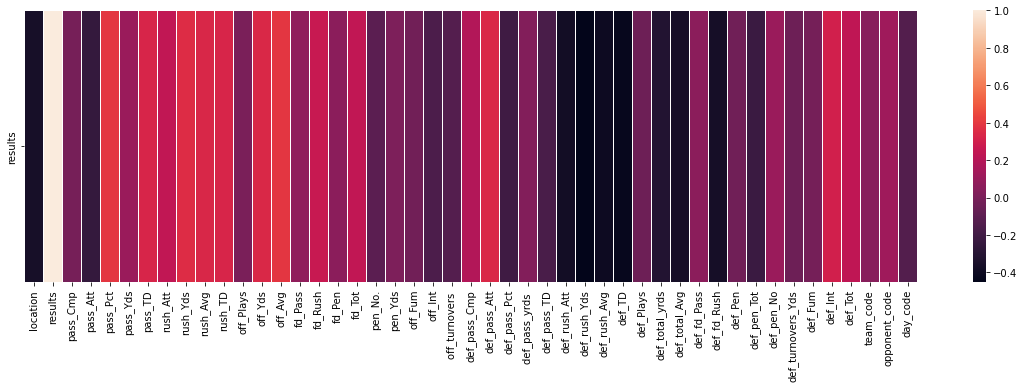

In [262]:
fig, ax = plt.subplots(figsize=(20,5))         
sns.heatmap(df1.corr().loc[['results'],:], linewidth=.9, ax=ax)


In [263]:
df1.corr().loc[['results']]

,location,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,...,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot,team_code,opponent_code,day_code
results,-0.364105,1.0,-0.013095,-0.250692,0.39144,0.106137,0.328225,0.236183,0.356592,0.335886,...,-0.032716,-0.226797,0.106353,-0.043671,-0.015715,0.300314,0.230604,0.043147,0.126846,-0.137426


In [264]:
df1.cov()

,location,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,...,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot,team_code,opponent_code,day_code
location,0.329897,-0.100301,-0.070339,0.596542,-1.316957,-2.098905,-0.162371,0.013960,-5.152921,-0.157882,...,0.058097,0.633269,-0.361899,-1.690614,0.038338,-0.091065,-0.052728,-0.016216,-1.261705,0.038445
results,-0.100301,0.230026,-0.044566,-1.188037,1.890561,5.037049,0.234751,1.184815,15.036619,0.278920,...,-0.027599,-0.669459,0.144115,-0.565507,-0.005369,0.123282,0.117912,0.071628,0.902491,-0.025021
pass_Cmp,-0.070339,-0.044566,50.352234,61.648948,33.878082,510.399699,5.548862,-29.671929,-216.833226,-1.993567,...,3.130906,-6.071306,2.630799,20.692440,0.593643,0.526632,1.120275,3.103308,-5.446950,-0.294459
pass_Att,0.596542,-1.188037,61.648948,97.634450,2.289884,610.170855,5.022552,-49.494416,-400.240335,-4.724195,...,4.062822,-3.146692,2.073991,31.038338,1.219502,-0.467676,0.751826,3.151847,-16.923432,-0.115872
pass_Pct,-1.316957,1.890561,33.878082,2.289884,101.408703,382.403211,6.250623,5.598378,73.191785,1.973534,...,1.901289,-13.023228,4.064712,7.641892,-0.238660,2.056379,1.817719,3.727180,13.994813,-0.662446
pass_Yds,-2.098905,5.037049,510.399699,610.170855,382.403211,9791.429768,94.537693,-148.437393,-1142.156465,-5.493073,...,34.623604,-9.649055,50.832152,447.917204,13.906465,-5.855348,8.051117,28.397552,-127.408183,0.359751
pass_TD,-0.162371,0.234751,5.548862,5.022552,6.250623,94.537693,2.223797,-0.074742,20.826568,0.603082,...,0.179983,-1.726482,0.811748,7.449205,0.173432,0.134665,0.308097,0.106207,-1.050473,-0.001181
rush_Att,0.013960,1.184815,-29.671929,-49.494416,5.598378,-148.437393,-0.074742,109.402921,689.767075,4.872777,...,-1.425473,-3.150129,2.244953,-5.256229,-0.798325,1.547036,0.748711,-4.188681,12.841173,-0.527277
rush_Yds,-5.152921,15.036619,-216.833226,-400.240335,73.191785,-1142.156465,20.826568,689.767075,7730.007517,124.517988,...,-5.430305,21.414841,17.187178,-33.300043,-3.257517,15.697595,12.440077,-53.133054,86.015571,-3.757947
rush_Avg,-0.157882,0.278920,-1.993567,-4.724195,1.973534,-5.493073,0.603082,4.872777,124.517988,2.997766,...,-0.008602,0.780230,0.080702,-1.123615,0.046596,0.242161,0.288756,-1.129317,1.602513,-0.022884


In [267]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [268]:

# fig, ax = plt.subplots(figsize=(90,90))         
# sns.heatmap(X.cov(), linewidth=.1, ax=ax)


In [269]:
# X_train.columns

In [270]:
df2 = df1.copy()

In [271]:
train = df2[df2["dates"] < '2022-09-30']
test = df2[df2["dates"] > '2022-09-30']

In [272]:
df2 = df2.drop(columns=['Date', 'team', 'Opponent', 'dates'])

In [273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           97 non-null     int64  
 1   results            97 non-null     int64  
 2   pass_Cmp           97 non-null     int64  
 3   pass_Att           97 non-null     int64  
 4   pass_Pct           97 non-null     float64
 5   pass_Yds           97 non-null     int64  
 6   pass_TD            97 non-null     int64  
 7   rush_Att           97 non-null     int64  
 8   rush_Yds           97 non-null     int64  
 9   rush_Avg           97 non-null     float64
 10  rush_TD            97 non-null     int64  
 11  off_Plays          97 non-null     int64  
 12  off_Yds            97 non-null     int64  
 13  off_Avg            97 non-null     float64
 14  fd_Pass            97 non-null     int64  
 15  fd_Rush            97 non-null     int64  
 16  fd_Pen             97 non-nu

In [274]:
df2.columns

Index(['location', 'results', 'pass_Cmp', 'pass_Att', 'pass_Pct', 'pass_Yds',
       'pass_TD', 'rush_Att', 'rush_Yds', 'rush_Avg', 'rush_TD', 'off_Plays',
       'off_Yds', 'off_Avg', 'fd_Pass', 'fd_Rush', 'fd_Pen', 'fd_Tot',
       'pen_No.', 'pen_Yds', 'off_Fum', 'off_Int', 'off_turnovers ',
       'def_pass_Cmp', 'def_pass_Att', 'def_pass_Pct', 'def_pass_yrds ',
       'def_pass_TD', 'def_rush_Att', 'def_rush_Yds', 'def_rush_Avg', 'def_TD',
       'def_Plays', 'def_total_yrds', 'def_total_Avg', 'def_fd_Pass',
       'def_fd_Rush', 'def_Pen', 'def_pen_Tot', 'def_pen_No',
       'def_turnovers_Yds', 'def_Fum', 'def_Int', 'def_Tot', 'team_code',
       'opponent_code', 'day_code'],
      dtype='object')

In [275]:
rf = RandomForestClassifier(
    n_estimators=50, min_samples_split=10, random_state=1)


In [281]:
predictors = df2.drop(columns=['results'])

In [282]:
rf.fit(train[predictors], train["results"])

ValueError: Boolean array expected for the condition, not int64

In [38]:
y = df2['results']
X = df2.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.10, random_state=2)

In [39]:
# X_train = X_train.drop(columns=['def_total_yrds', 'off_Yds'])
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_hat_train = lr2.predict(X_train)
r2_score(y_train, y_hat_train)

0.6175600111044213

In [106]:
column_list = df2.columns

In [107]:
X_train.columns

Index(['location', 'pass_Cmp', 'pass_Att', 'pass_Pct', 'pass_Yds', 'pass_TD',
       'rush_Att', 'rush_Yds', 'rush_Avg', 'rush_TD', 'off_Plays', 'off_Yds',
       'off_Avg', 'fd_Pass', 'fd_Rush', 'fd_Pen', 'fd_Tot', 'pen_No.',
       'pen_Yds', 'off_Fum', 'off_Int', 'off_turnovers ', 'def_pass_Cmp',
       'def_pass_Att', 'def_pass_Pct', 'def_pass_yrds ', 'def_pass_TD',
       'def_rush_Att', 'def_rush_Yds', 'def_rush_Avg', 'def_TD', 'def_Plays',
       'def_total_yrds', 'def_total_Avg', 'def_fd_Pass', 'def_fd_Rush',
       'def_Pen', 'def_pen_Tot', 'def_pen_No', 'def_turnovers_Yds', 'def_Fum',
       'def_Int', 'def_Tot'],
      dtype='object')

In [108]:
from itertools import combinations
columns_list = X.columns
interactions = list(combinations(column_list, 2))

In [109]:
len(interactions)

946

In [110]:
X

,location,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,rush_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,2,20,33,60.6,260,2,38,132,3.5,1,...,5.4,14,8,3,25,4,45,2,0,2
1,0,9,17,52.9,61,0,42,201,4.8,1,...,7.9,13,10,0,23,6,40,0,2,2
2,0,24,42,57.1,214,1,22,75,3.4,1,...,5.6,11,8,1,20,7,39,1,0,1
3,0,4,6,66.7,51,0,27,37,1.4,0,...,7.9,16,11,1,28,5,60,1,0,1
4,1,19,39,48.7,337,2,31,101,3.3,0,...,3.6,2,14,3,19,10,94,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1,14,24,58.3,179,0,39,133,3.4,2,...,3.3,7,8,0,15,4,26,0,0,0
93,0,20,32,62.5,192,1,21,102,4.9,0,...,6.0,15,10,3,28,5,55,2,0,2
94,1,22,30,73.3,220,0,42,150,3.6,2,...,6.4,4,8,1,13,1,5,1,1,2
95,0,17,25,68.0,211,1,40,97,2.4,1,...,4.1,8,7,1,16,5,35,0,1,1


In [111]:
new_interactions = []
for i in interactions:
    if (i[0] == 'results'):
        continue
    elif (i[1] == 'results'):
        continue
    else:
        new_interactions.append(i)

In [112]:
len(new_interactions)

903

In [113]:
interaction_dict = {}

for interaction in new_interactions:
    X_train_int = X
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    lr3 = LinearRegression()
    lr3.fit(X_train_int, y)
    interaction_dict[lr3.score(X_train_int, y)] = interaction

In [114]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('location', 'def_rush_Avg')
('location', 'pen_No.')
('pass_Cmp', 'def_Pen')
('def_total_yrds', 'def_Pen')
('def_Plays', 'def_Pen')


In [115]:
# from df features

In [116]:
X_train_int = X
X_train_int['lo_oen'] = X_train_int['location'] * X_train_int['pen_No.']

In [117]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.6378892576506042

In [118]:
X_train_int = X
X_train_int['cmp_def_pen'] = X_train_int['pass_Cmp'] * X_train_int['def_Pen']

In [119]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.6734554117862992

In [120]:
X_train_int = X
X_train_int['pen_def_rush'] = X_train_int['fd_Pen'] * X_train_int['def_rush_Yds']

In [121]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.6987629778691764

In [122]:
# from  X_train features 

In [123]:
X_train_int = X
X_train_int['lo_def'] = X_train_int['location'] * X_train_int['def_total_Avg']

In [124]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.708716542923256

In [125]:
X_train_int = X
X_train_int['pass_def'] = X_train_int['pass_Pct'] * X_train_int['def_Pen']

In [126]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.711074504077726

In [127]:
X_train_int = X
X_train_int['def_pass_att'] = X_train_int['pass_Pct'] * X_train_int['def_pass_Att']

In [128]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.7111018979329453

In [129]:
X_train_int = X
X_train_int['loc_def_rush'] = X_train_int['location'] * X_train_int['def_rush_Avg']

In [130]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.717744453030206

In [131]:
from sklearn.preprocessing import PolynomialFeatures

poly_dict = {}

for feature in X_train_int.columns:
    for p in range(2, 5):
        X_train_poly = X_train_int
        X_train_poly['sq'] = X_train_poly[feature] ** p
        lr = LinearRegression()
        lr.fit(X_train_poly, y)
        poly_dict[lr.score(X_train_poly, y)] = [feature, p]
                  
poly_dict[max(poly_dict.keys())]
                  

['def_rush_Yds', 2]

In [132]:
# poly_dict

In [55]:
# whole df
# 0.7526971321577923: ['def_Fum', 3],

In [56]:
#  0.8325329923245015: ['rush_TD', 4],